1. Setup and Imports

In [1]:
import sys
from pathlib import Path
import yaml
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = str(Path.cwd().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

# Import your modules
from src.data.data_processing import DataProcessor
from src.models.model_training import ModelTrainer

# Load base configuration
with open('../configs/config.yml', 'r') as f:
    base_config = yaml.safe_load(f)

2. Load Processed Data

In [2]:
# Load the already processed data
processed_data_path = base_config['data']['processed_data_path']
raw_data_file_name = base_config['data']['raw_data_file_name']
df = pd.read_csv(f"{processed_data_path}processed_{raw_data_file_name}")

# Get target column
target_column_name = base_config['data']['raw_data_target_column']['name']
if base_config['data']['raw_data_target_column']['type'] == 'categorical':
    target_column_name = f'{target_column_name}_categorical_encoded'

# Prepare data
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

3. Experiment: Different Model Configurations

In [3]:
def run_experiment(config_variations, X, y):
    """Run experiments with different model configurations."""
    results = []
    
    for variant in config_variations:
        # Create new config for this experiment
        experiment_config = base_config.copy()
        experiment_config['training']['model']['params'].update(variant['params'])
        
        # Train model
        trainer = ModelTrainer(experiment_config)
        metrics = trainer.train_model(X, y)
        
        # Store results
        results.append({
            'experiment_name': variant['name'],
            'params': variant['params'],
            'metrics': metrics,
            'trainer': trainer
        })
        
        print(f"\nExperiment: {variant['name']}")
        print("Parameters:", variant['params'])
        print("Metrics:", metrics)
    
    return results

# Define different configurations to try
config_variations = [
    {
        'name': 'Basic Clustering',
        'params': {
            'n_clusters': 3,             # Number of clusters to form
            'init': 'k-means++',         # Method for initialization
            'max_iter': 300,             # Maximum iterations for a single run
            'n_init': 10                 # Number of times to run with different centroid seeds
        }
    },
    {
        'name': 'More Clusters',
        'params': {
            'n_clusters': 5,
            'init': 'k-means++',
            'max_iter': 500,
            'n_init': 20
        }
    }
]

# Run experiments
experiment_results = run_experiment(config_variations, X, y)

experiment_results


 MODEL TRAINER: SUPERVISED_CLASSIFICATION algorithm will be used
/n MODEL FACTORY: Random Forest Classifier will be used for training with the following parameters: {'n_estimators': 100, 'max_depth': 10, 'random_state': 42, 'min_samples_split': 2}

Experiment: Baseline Model
Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}
Metrics: {'accuracy': 0.4742585525875343, 'precision': 0.5616973284090816, 'recall': 0.4742585525875343, 'f1': 0.42512487266649046}

 MODEL TRAINER: SUPERVISED_CLASSIFICATION algorithm will be used
/n MODEL FACTORY: Random Forest Classifier will be used for training with the following parameters: {'n_estimators': 100, 'max_depth': 20, 'random_state': 42, 'min_samples_split': 2}

Experiment: Deep Trees Model
Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}
Metrics: {'accuracy': 0.5655084689027248, 'precision': 0.6253368495241471, 'recall': 0.5655084689027248, 'f1': 0.5401218452973682}

 MODEL TRAINER: SUPERVISED_CLA

[{'experiment_name': 'Baseline Model',
  'params': {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2},
  'metrics': {'accuracy': 0.4742585525875343,
   'precision': 0.5616973284090816,
   'recall': 0.4742585525875343,
   'f1': 0.42512487266649046},
  'trainer': <src.models.model_training.ModelTrainer at 0x15f91bdd0>},
 {'experiment_name': 'Deep Trees Model',
  'params': {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2},
  'metrics': {'accuracy': 0.5655084689027248,
   'precision': 0.6253368495241471,
   'recall': 0.5655084689027248,
   'f1': 0.5401218452973682},
  'trainer': <src.models.model_training.ModelTrainer at 0x15f63b9b0>},
 {'experiment_name': 'More Trees Model',
  'params': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2},
  'metrics': {'accuracy': 0.4750619267590547,
   'precision': 0.5625635164657208,
   'recall': 0.4750619267590547,
   'f1': 0.4261006045930984},
  'trainer': <src.models.model_training.ModelTrainer at 0x15f0b8d70>}]

4. Analyze Results

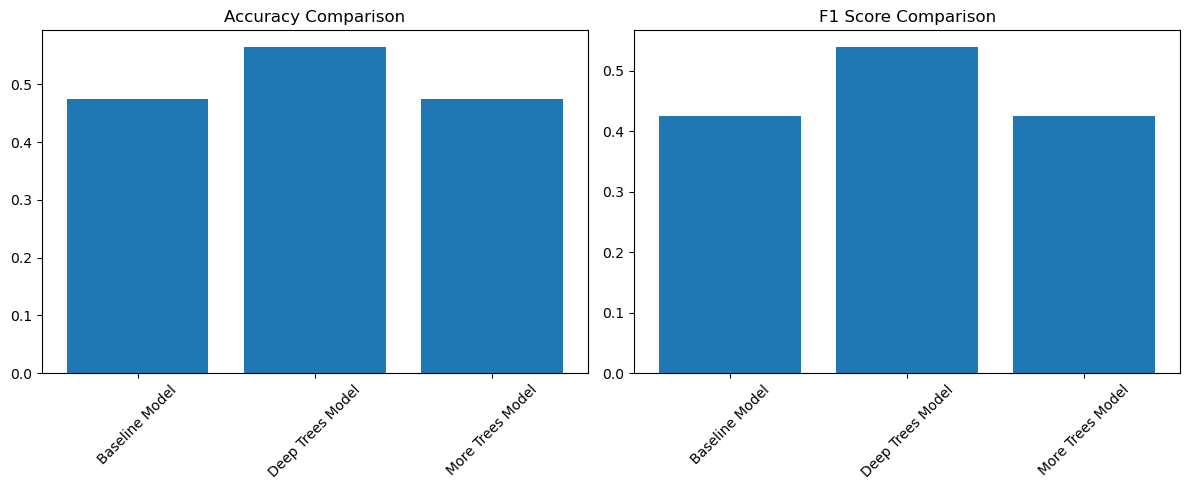

In [4]:
# Create comparison visualizations
def plot_experiment_comparisons(results):
    # Extract metrics for comparison
    experiment_names = [r['experiment_name'] for r in results]
    accuracies = [r['metrics'].get('accuracy', 0) for r in results]
    f1_scores = [r['metrics'].get('f1', 0) for r in results]
    
    # Plot comparisons
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(experiment_names, accuracies)
    plt.title('Accuracy Comparison')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.bar(experiment_names, f1_scores)
    plt.title('F1 Score Comparison')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_experiment_comparisons(experiment_results)